In [258]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [259]:
df_test = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv',header = None,names = ['id','company','sentiment','comment'])
df_train = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv',header = None,names = ['id','company','sentiment','comment'])

In [260]:
df_train.head()

,id,company,sentiment,comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [261]:
df_train.dropna(inplace = True)

In [262]:
import spacy
import regex as re

In [263]:
nlp = spacy.load('en_core_web_sm')

In [264]:
import nltk

In [265]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords

In [266]:
stop_words = stopwords.words('english')
ps = PorterStemmer()

In [267]:
def pre_process(text):
    pattern = '[^a-zA-Z0-9]'
    new_text = re.sub(pattern,' ',text)
    new_text = new_text.lower()
    new_text = [ps.stem(word) for word in new_text if word not in stop_words]
    return ''.join(new_text)

In [268]:
df_train['pre_processed_parsed_text'] = df_train['comment'].apply(pre_process)

In [269]:
df_train.head()

,id,company,sentiment,comment,pre_processed_parsed_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,geng n brerln n wll urer u ll
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,cng he brer n wll kll u ll
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,geng n brerln n wll kll u ll
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,cng n brerln n wll urer u ll
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,geng n brerln 2 n wll urer u e ll


In [177]:
df_train['company'].value_counts().sort_values(ascending = False)[:3]

company
MaddenNFL          2377
LeagueOfLegends    2377
CallOfDuty         2376
Name: count, dtype: int64

In [164]:
#word cloud for positive
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [178]:
word_cloud_text = ''.join(df_train[df_train['company'] == 'MaddenNFL']['comment'])
wc = WordCloud().generate(word_cloud_text)

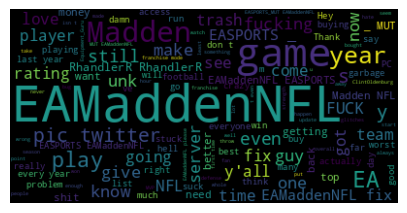

In [179]:
plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [270]:
text = ''.join(df_train['pre_processed_parsed_text'])
unique_words = list(set(text.split()))

In [285]:
vocab_size = len(unique_words)

In [286]:
vocab_size

26513

In [272]:
#extrating features
from sklearn.feature_extraction.text import TfidfVectorizer

In [188]:
tf_idf = TfidfVectorizer(max_features = vocab_size)
x = tf_idf.fit_transform(df_train['pre_processed_parsed_text'])

In [126]:
len(x.toarray())

73996

In [273]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [274]:
y = le.fit_transform(df_train['sentiment'])

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)

In [132]:
#using RF classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [133]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [134]:
rf.score(xtrain,ytrain)

0.9677511994053652

In [135]:
ypred = rf.predict(xtest)

In [136]:
from sklearn.metrics import accuracy_score

In [137]:
accuracy_score(ypred,ytest)

0.9008108108108108

# Topic Modelling

In [187]:
from sklearn.decomposition import LatentDirichletAllocation

In [207]:
tf_idf2 = TfidfVectorizer(max_features=100)
x2 = tf_idf2.fit_transform(df_train['comment'])

In [208]:
lda = LatentDirichletAllocation(n_components = 10)
# Fit and Transform SVD model on data
lda_matrix = lda.fit_transform(x2)

# Get Components 
lda_components=lda.components_

In [209]:
terms = tf_idf1.get_feature_names_out()

In [210]:
for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['pl he ge', 'helh ervce hve', 'cn ken uch', 'he re he', 'he hve cce', 'fr nher chnce', 'rewee ever fr']
Topic 1:  ['blck cl wr', 'pl he ge', 'rewee ever fr', 'fr blefel pler', 'bf4b pler bn', 'he be ge', 'enerng grn uner']
Topic 2:  ['ee el bf4b', 'ken uch ep', 'rewr zn ge', 'he ge bu', 'eu cn ken', 'he eu cn', 'ne he be']
Topic 3:  ['ge pc wer', 'pl he ge', 'nereng quz zn', 've been plng', 'peple peple peple', 'fr he new', 'bn fr blefel']
Topic 4:  ['rhnlerr pc wer', 'ccurre ee el', 'nher chnce wn', 'he fr he', 'wn 100 zn', 'he ve ee', 'pl he ge']
Topic 5:  ['rewee ever fr', 'bf4b pler bn', 'he ge fr', 'pl he ge', 'el bf4b pler', 'he he he', 'here re currenl']
Topic 6:  ['he fc here', 'quz zn ur', 'he pver lne', 'nw fr free', 'ever fr nher', 'pl he ge', 'jhnn jhnn ellng']
Topic 7:  ['pl he ge', 'pver lne he', 'he fr he', 'rewee ever fr', 'bf4b pler bn', 'peple lvng belw', 'zn ge hre']
Topic 8:  ['cv 19 vccne', 'fr he ge', 'he en he', 'ur luck fr', 'rewee ever fr', 'ever fr 

In [206]:
top_terms_key

[('ccurre ee el', 1387.235543292873),
 ('fc here re', 1118.8870668189777),
 ('gf cr rewee', 906.9263358316276),
 ('zn ge hre', 893.831059504107),
 ('cv 19 vccne', 832.0994840650363),
 ('hnk fr enerng', 786.3756596025444),
 ('fr blefel pler', 627.3608846572281)]

In [ ]:
#because we have used stemming, only root words are shown here

# Deep learning

In [236]:
#lets use LSTM RNN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [287]:
ohe = [one_hot(i,vocab_size) for i in df_train['pre_processed_parsed_text']]

In [288]:
ohe[0]

[24591, 22583, 7902, 22583, 9368, 20839, 1196, 19297]

In [289]:
#padding
padding = pad_sequences(ohe,maxlen = 10)

In [290]:
padding[0]

array([    0,     0, 24591, 22583,  7902, 22583,  9368, 20839,  1196,
       19297], dtype=int32)

In [279]:
 y

array([3, 3, 3, ..., 3, 3, 3])

In [291]:
model = Sequential()
model.add(Embedding(vocab_size,100,input_length=10)) #100 is output dim (max_features)
model.add(LSTM(100))
model.add(Dense(4,activation = 'softmax'))

In [292]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 100)           2651300   
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 4)                 404       
                                                                 
Total params: 2732104 (10.42 MB)
Trainable params: 2732104 (10.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [293]:
model.compile(loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [294]:
xtrain,xtest,ytrain,ytest = train_test_split(padding,y,test_size = 0.2)

In [295]:
model.fit(xtrain,ytrain,validation_split = 0.2,validation_data = (xtest,ytest), epochs = 2)

Epoch 1/2
1850/1850 [==============================] - 38s 19ms/step - loss: 1.1365 - accuracy: 0.5097 - val_loss: 1.0383 - val_accuracy: 0.5668
Epoch 2/2
1850/1850 [==============================] - 35s 19ms/step - loss: 0.9257 - accuracy: 0.6289 - val_loss: 0.8911 - val_accuracy: 0.6482


# pipeline from Hugging face to directly predict the sentiments

In [448]:

from transformers import pipeline

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [456]:
xtrain[0]

'im getting on borderlands and i will murder you all ,'

In [449]:
classifier.predict(xtrain[0])

[{'label': 'NEGATIVE', 'score': 0.9834704995155334}]

In [455]:
le.inverse_transform([3])

array(['Positive'], dtype=object)

# fine tuning transformers

In [305]:
import datasets
from transformers import TFAutoModelForSequenceClassification
from tensorflow.keras.optimizers import Adam
from transformers import AutoTokenizer
import tensorflow as tf

In [435]:
df_train.head()

,id,company,sentiment,comment,pre_processed_parsed_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,geng n brerln n wll urer u ll
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,cng he brer n wll kll u ll
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,geng n brerln n wll kll u ll
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,cng n brerln n wll urer u ll
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,geng n brerln 2 n wll urer u e ll


In [436]:
df_transformers = pd.DataFrame()
df_transformers['text'] = df_train['comment']
df_transformers['label'] = y

In [437]:
df_transformers.head()

,text,label
0,im getting on borderlands and i will murder yo...,3
1,I am coming to the borders and I will kill you...,3
2,im getting on borderlands and i will kill you ...,3
3,im coming on borderlands and i will murder you...,3
4,im getting on borderlands 2 and i will murder ...,3


In [438]:
xtrain,xtest,ytrain,ytest = train_test_split(df_transformers['text'],df_transformers['label'],test_size = 0.2)

In [439]:
df_train_dataset = datasets.Dataset.from_pandas(pd.DataFrame(xtrain))

In [440]:
df_train_dataset.shape

(59196, 2)

In [441]:
df_train_label = pd.DataFrame(ytrain)

In [442]:
df_test_dataset = datasets.Dataset.from_pandas(pd.DataFrame(xtest))

In [443]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [444]:
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased",num_labels=4)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [445]:
train_tokenized_data1 = tokenizer(df_train_dataset['text'], padding=True, truncation=True,max_length = 10, return_tensors='tf')
train_labels = tf.convert_to_tensor(df_train_label['label'])

In [446]:
tf_dataset = tf.data.Dataset.from_tensor_slices((dict(train_tokenized_data1), train_labels))

In [447]:
model.compile(optimizer=Adam(3e-5))  # No loss argument!
model.fit(tf_dataset,batch_size = 5)

  559/59196 [..............................] - ETA: 10:28:59 - loss: 1.3556

KeyboardInterrupt: 